In [1]:
import tensorflow as tf
import numpy as np # for one-hot encoding
from sklearn import datasets, model_selection
import matplotlib.pyplot as plt

In [2]:
plt.style.use("dark_background")

In [3]:
x, y = datasets.fetch_openml('mnist_784', version=1, return_X_y=True)

In [4]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y)

In [5]:
def indices_to_one_hot(data, nb_classes):
    """Convert an iterable of indices to one-hot encoded labels."""
    targets = np.array(data, dtype='uint8').reshape(-1)
    return np.eye(nb_classes)[targets]

In [6]:
nb_classes = int(int(y.max()) + 1) # classes from 0 to 9

y_train = indices_to_one_hot(y_train, nb_classes)
y_test = indices_to_one_hot(y_test, nb_classes)

In [7]:
first_image = x_train[2]
first_image = np.array(first_image, dtype='float')
first_image = first_image.reshape((28, 28))

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


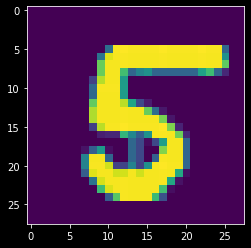

In [8]:
plt.imshow(first_image)
print(y_train[2])

In [9]:
tf.print(tf.random.normal([1, 2]))

[[1.25326085 -0.150003627]]


In [22]:
n_input = 784 #28*28
n_hidden_1 = 256
n_hidden_2 = 256
n_classes = 10

weights = {
    'h1': tf.Variable(tf.random.normal([n_input, n_hidden_1], dtype='float64'), trainable=True),
    'h2': tf.Variable(tf.random.normal([n_hidden_1, n_hidden_2], dtype='float64'), trainable=True),
    'out': tf.Variable(tf.random.normal([n_hidden_2, n_classes], dtype='float64'), trainable=True)
}

biases = {
    'h1': tf.Variable(tf.random.normal([n_hidden_1], dtype='float64'), trainable=True),
    'h2': tf.Variable(tf.random.normal([n_hidden_2], dtype='float64'), trainable=True),
    'out': tf.Variable(tf.random.normal([n_classes], dtype='float64'), trainable=True)
}

In [23]:
weights['h1']

<tf.Variable 'Variable_6:0' shape=(784, 256) dtype=float64>

In [24]:
def forward_propagation(x, weights, biases):
    in_layer1 = tf.add(tf.matmul(x, weights['h1']), biases['h1'])
    out_layer1 = tf.nn.relu(in_layer1)
    
    in_layer2 = tf.add(tf.matmul(out_layer1, weights['h2']), biases['h2'])
    out_layer2 = tf.nn.relu(in_layer2)
    
    output = tf.add(tf.matmul(out_layer2, weights['out']), biases['out'])
    return output

In [25]:
train_pred = forward_propagation(x_train, weights, biases)

train_predictions = tf.argmax(train_pred, axis=1)
true_train_labels = tf.argmax(y_train, axis=1)

train_predictions

<tf.Tensor 'ArgMax:0' shape=(52500,) dtype=int64>

In [26]:
tf.print(train_predictions), tf.print(true_train_labels)

(<tf.Operation 'PrintV2' type=PrintV2>,
 <tf.Operation 'PrintV2_1' type=PrintV2>)

In [28]:
# tf.compat.v1.enable_eager_execution()

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=train_pred, labels=y_train))

tf.print(cost)

<tf.Operation 'PrintV2_2' type=PrintV2>

In [29]:
bool_correct_pred = tf.equal(train_predictions, true_train_labels)

tf.print(bool_correct_pred)

tf.print(tf.reduce_sum(tf.cast(bool_correct_pred, tf.float32)))

<tf.Operation 'PrintV2_4' type=PrintV2>

In [30]:
# optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

tf.compat.v1.disable_eager_execution()
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=0.01)
optimize = optimizer.minimize(cost)

In [31]:
tf.compat.v1.trainable_variables()

[<tf.Variable 'Variable:0' shape=(784, 256) dtype=float64>,
 <tf.Variable 'Variable_1:0' shape=(256, 256) dtype=float64>,
 <tf.Variable 'Variable_2:0' shape=(256, 10) dtype=float64>,
 <tf.Variable 'Variable_3:0' shape=(256,) dtype=float64>,
 <tf.Variable 'Variable_4:0' shape=(256,) dtype=float64>,
 <tf.Variable 'Variable_5:0' shape=(10,) dtype=float64>,
 <tf.Variable 'Variable_6:0' shape=(784, 256) dtype=float64>,
 <tf.Variable 'Variable_7:0' shape=(256, 256) dtype=float64>,
 <tf.Variable 'Variable_8:0' shape=(256, 10) dtype=float64>,
 <tf.Variable 'Variable_9:0' shape=(256,) dtype=float64>,
 <tf.Variable 'Variable_10:0' shape=(256,) dtype=float64>,
 <tf.Variable 'Variable_11:0' shape=(10,) dtype=float64>]

In [50]:
sess = tf.compat.v1.Session()

sess.run(tf.compat.v1.global_variables_initializer())

In [63]:
for i in range(50):
    c, _ = sess.run([cost, optimize])

print(c)

# tf.compat.v1.enable_eager_execution()

train_pred = forward_propagation(x_train, weights, biases)

train_predictions = tf.argmax(train_pred, axis=1)
true_train_labels = tf.argmax(y_train, axis=1)

train_predictions

5614.268824226974


<tf.Tensor 'ArgMax_8:0' shape=(52500,) dtype=int64>

In [64]:
print(sess.run(train_predictions))

[9 4 5 ... 2 2 8]


In [65]:
bool_correct_pred = sess.run(tf.equal(train_predictions, true_train_labels))

tf.print(bool_correct_pred)

tf.print(tf.reduce_sum(tf.cast(bool_correct_pred, tf.float32)))

<tf.Operation 'PrintV2_8' type=PrintV2>

In [66]:
no_correct_pred = sess.run(tf.reduce_sum(tf.cast(bool_correct_pred, tf.float32)))

In [67]:
no_correct_pred/x_train.shape[0] * 100 # accuracy percent

92.46857142857144